In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import io

In [3]:
qpcr_results = pd.read_excel("./qpcr-data/2020324 LOD Study 1.xlsx", sheet_name="Results", skiprows=42, na_values=['Undetermined'])

# Standard Curve

In [4]:
sc = qpcr_results[qpcr_results['Sample Name'].str.contains('PCD')]

In [5]:
sc[['Sample Name', 'CT', 'Quantity', 'Amp Status']]

,Sample Name,CT,Quantity,Amp Status
20,PCD 1,15.477155,1.000000e+00,Inconclusive
21,PCD 1,15.546387,1.000000e+00,Inconclusive
40,PCD 2,19.514751,1.000000e-01,Amp
41,PCD 2,19.224674,1.000000e-01,Amp
60,PCD 3,24.433836,1.000000e-02,Amp
61,PCD 3,23.878082,1.000000e-02,Amp
80,PCD 4,27.071386,1.000000e-03,Amp
81,PCD 4,27.720718,1.000000e-03,Amp
100,PCD 5,31.760553,1.000000e-04,Amp
101,PCD 5,31.213282,1.000000e-04,Amp


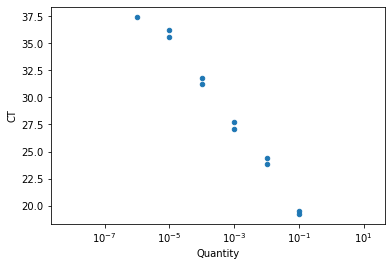

In [6]:
sc[sc['Amp Status'] == 'Amp'].plot.scatter(x='Quantity', y='CT', logx=True)

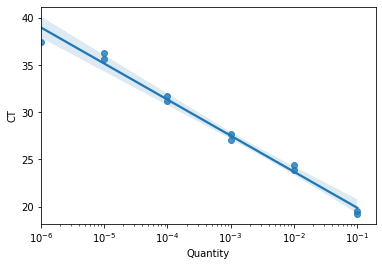

In [7]:
ax = sns.regplot(data=sc[sc['Amp Status'] == 'Amp'], x='Quantity', y='CT', logx=True)
ax.set_xscale('log')

# Negative Controls

In [8]:
negs = qpcr_results.loc[qpcr_results['Sample Name'].str.contains('Negative')]
negs

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,CQCONF,EXPFAIL,HIGHSD,DRNMIN,THOLDFAIL
0,1,A1,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,True,3,24,No Amp,NaN,N,N,N,N,N
1,1,A1,False,Negative,VIC,NTC,VIC,NFQ-MGB,NaN,NaN,...,True,3,49,No Amp,NaN,N,N,N,N,Y
142,85,H1,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,True,3,9,No Amp,NaN,N,N,N,N,N
143,85,H1,False,Negative,VIC,NTC,VIC,NFQ-MGB,NaN,NaN,...,True,3,49,No Amp,NaN,N,N,N,N,Y


In [9]:
negs['Amp Status'].str.match('Amp').any()

False

# CoV

In [63]:
ncov = qpcr_results[(qpcr_results['Reporter'] == 'FAM') & qpcr_results['Sample Name'].str.contains('nCoV')]

In [64]:
ncov.loc[:, 'Sample Number'] = ncov['Sample Name'].str.replace(r'[\D]*([0-9]+)[\D]*', r'\1').astype(np.int)

/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/anton/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


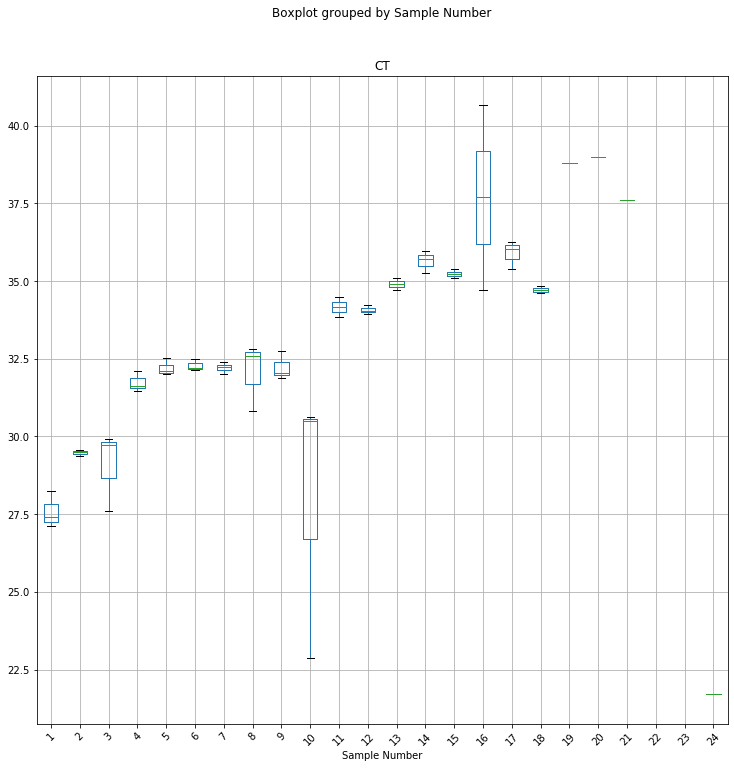

In [65]:
ncov.boxplot(by='Sample Number', column='CT', rot=45, figsize=(12,12))

In [5]:
sample_data = '''
Sample Number	NP Sample	"Spike"	Control	"Control Conc"	"Volume"
1		1000	PCD 1	2.00E+05	5
2		1000	PCD 1	2.00E+05	5
3		1000	PCD 1	2.00E+05	5
4		200	PCD 1	2.00E+05	1
5		200	PCD 1	2.00E+05	1
6		200	PCD 1	2.00E+05	1
7		100	PCD 2	2.00E+04	5
8		100	PCD 2	2.00E+04	5
9		100	PCD 2	2.00E+04	5
10		50	PCD 2	2.00E+04	2.5
11		50	PCD 2	2.00E+04	2.5
12		50	PCD 2	2.00E+04	2.5
13		20	PCD 2	2.00E+04	1
14		20	PCD 2	2.00E+04	1
15		20	PCD 2	2.00E+04	1
16		10	PCD 3	2.00E+03	5
17		10	PCD 3	2.00E+03	5
18		10	PCD 3	2.00E+03	5
19		2	PCD 3	2.00E+03	1
20		2	PCD 3	2.00E+03	1
21		2	PCD 3	2.00E+03	1
22		0	NEG	0	0
23		0	NEG	0	0
24		0	NEG	0	0'''

sample_data = pd.read_table(io.StringIO(sample_data))

In [67]:
ncov = ncov.merge(sample_data)

In [68]:
ncov

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,EXPFAIL,HIGHSD,DRNMIN,THOLDFAIL,Sample Number,NP Sample,Spike,Control,Control Conc,Volume
0,2,A2,False,1 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,27.103718,27.587683,...,N,Y,Y,N,1,AJ,1000,PCD 1,200000.0,5.0
1,3,A3,False,1 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,27.412361,27.587683,...,N,Y,N,N,1,AJ,1000,PCD 1,200000.0,5.0
2,4,A4,False,1 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,28.246962,27.587683,...,N,Y,N,N,1,AJ,1000,PCD 1,200000.0,5.0
3,5,A5,False,9 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,31.876540,32.229702,...,N,N,N,N,9,MM,100,PCD 2,20000.0,5.0
4,6,A6,False,9 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,32.053432,32.229702,...,N,N,N,N,9,MM,100,PCD 2,20000.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,90,H6,False,16 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,34.719128,37.687691,...,N,Y,N,N,16,AJ,10,PCD 3,2000.0,5.0
68,91,H7,False,16 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,NaN,37.687691,...,Y,N,N,N,16,AJ,10,PCD 3,2000.0,5.0
69,92,H8,False,24 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,21.705557,21.705557,...,N,N,N,N,24,MM,0,NEG,0.0,0.0
70,93,H9,False,24 nCoV,FAM,UNKNOWN,FAM,NFQ-MGB,NaN,21.705557,...,Y,N,Y,N,24,MM,0,NEG,0.0,0.0


In [84]:
ncov['CT'].unique()

array([27.103718, 27.412361, 28.246962, 31.87654 , 32.053432, 32.759132,
       35.395412, 36.03259 , 36.258595, 29.386175, 29.570824, 29.499216,
       30.512108, 30.619509, 22.863413, 34.85283 , 34.697594, 34.611485,
       29.723446, 27.59578 , 29.907217, 34.498814, 34.151367, 33.835663,
             nan, 38.809345, 31.46198 , 31.628157, 32.11559 , 34.035988,
       33.949722, 34.213688, 38.995506, 32.010754, 32.09376 , 32.514175,
       34.713184, 35.088818, 34.910313, 37.59109 , 32.12175 , 32.211124,
       32.48231 , 35.241123, 35.94973 , 35.693542, 32.017143, 32.232494,
       32.389534, 35.37284 , 35.2232  , 35.084908, 30.805428, 32.817524,
       32.598072, 40.65625 , 34.719128, 21.705557])

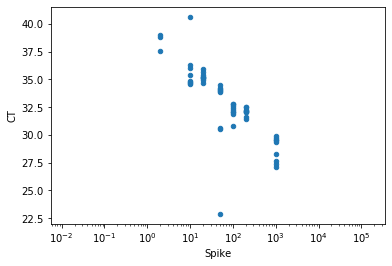

In [101]:
ncov[ncov['Spike'] > 0].plot.scatter(x='Spike', y='CT', logx=True)

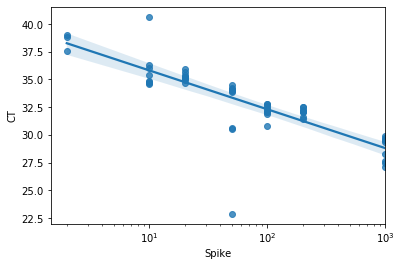

In [102]:
ax = sns.regplot(data=ncov[ncov['Spike']>0], x='Spike', y='CT', logx=True)
ax.set_xscale('log')

## Yield

In [104]:
ncov['Quantity'] = ncov['Quantity'] * 1e6

In [105]:
ncov['Quantity']

0      1223.398256
1      1018.759911
2       621.022191
3        72.152492
4        64.966523
          ...     
67       13.368946
68             NaN
69    30057.342723
70             NaN
71             NaN
Name: Quantity, Length: 72, dtype: float64

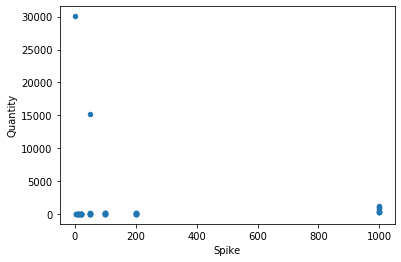

In [108]:
ncov.plot.scatter(x='Spike', y='Quantity')

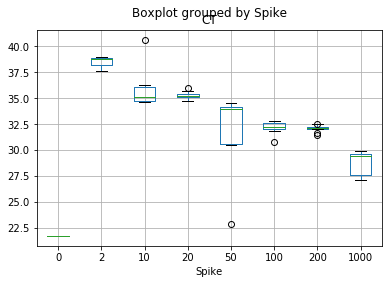

In [109]:
ncov.boxplot(by='Spike', column='CT')

In [110]:
ncov['RNA Input'] = ncov['Spike'] * 400 / 30 * 5

In [111]:
ncov.loc[:,'Yield'] = ncov['Quantity'] / ncov['RNA Input']

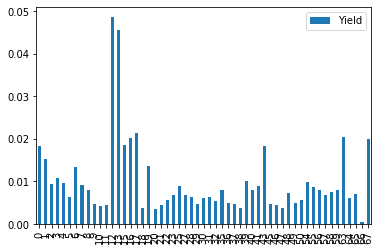

In [114]:
ncov[ncov['Yield'] < 1][['Sample Name','Yield']].plot.bar()

In [115]:
ncov[ncov['Yield'] < 1]['Yield'].describe()

count    55.000000
mean      0.010032
std       0.008832
min       0.000593
25%       0.004915
50%       0.007357
75%       0.010010
max       0.048619
Name: Yield, dtype: float64

In [116]:
(ncov['Quantity'] * 6) / (ncov['Spike'] * 400)

0     0.018351
1     0.015281
2     0.009315
3     0.010823
4     0.009745
        ...   
67    0.020053
68         NaN
69         inf
70         NaN
71         NaN
Length: 72, dtype: float64

## Diag

In [117]:
pos = qpcr_results[qpcr_results['Sample Name']=='PCD 1']
(pos['CT'] > 16).all()
(pos['CT'] < 23).all()

True

In [118]:
pos

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,CQCONF,EXPFAIL,HIGHSD,DRNMIN,THOLDFAIL
20,11,A11,False,PCD 1,FAM,STANDARD,FAM,NFQ-MGB,15.477155,15.51177,...,True,3,10,Inconclusive,NaN,Y,N,N,N,N
21,12,A12,False,PCD 1,FAM,STANDARD,FAM,NFQ-MGB,15.546387,15.51177,...,True,3,9,Inconclusive,NaN,Y,N,N,N,N


In [119]:
neg = qpcr_results[(qpcr_results['Sample Name']=='Negative') & (qpcr_results['Target Name'] == 'FAM')]
neg

,Well,Well Position,Omit,Sample Name,Target Name,Task,Reporter,Quencher,CT,Ct Mean,...,Automatic Baseline,Baseline Start,Baseline End,Amp Status,Comments,CQCONF,EXPFAIL,HIGHSD,DRNMIN,THOLDFAIL
0,1,A1,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,True,3,24,No Amp,NaN,N,N,N,N,N
142,85,H1,False,Negative,FAM,NTC,FAM,NFQ-MGB,NaN,NaN,...,True,3,9,No Amp,NaN,N,N,N,N,N


In [120]:
ierc = qpcr_results[(qpcr_results['Reporter'] == 'VIC') & qpcr_results['Sample Name'].str.contains('nCoV')]

In [121]:
ierc['CT'].describe()

count    11.000000
mean     19.396648
std      10.169322
min       5.177041
25%      12.634308
50%      17.439768
75%      26.243541
max      37.832657
Name: CT, dtype: float64

In [122]:
ierc.sort_values(by='Sample Name')[['Sample Name','CT','Amp Status']]

,Sample Name,CT,Amp Status
3,1 nCoV,15.882493,No Amp
5,1 nCoV,NaN,No Amp
7,1 nCoV,NaN,No Amp
33,10 nCoV,NaN,No Amp
29,10 nCoV,NaN,No Amp
...,...,...,...
147,8 nCoV,NaN,Inconclusive
149,8 nCoV,NaN,No Amp
13,9 nCoV,NaN,No Amp
11,9 nCoV,NaN,No Amp


In [123]:
ncov.sort_values(by='Sample Number')[['Sample Name','CT','Spike','Amp Status']]

,Sample Name,CT,Spike,Amp Status
0,1 nCoV,27.103718,1000,Amp
1,1 nCoV,27.412361,1000,Amp
2,1 nCoV,28.246962,1000,Amp
11,2 nCoV,29.499216,1000,Amp
9,2 nCoV,29.386175,1000,Amp
...,...,...,...,...
61,23 nCoV,NaN,0,No Amp
62,23 nCoV,NaN,0,No Amp
70,24 nCoV,NaN,0,No Amp
69,24 nCoV,21.705557,0,No Amp


In [124]:
neg['CT'].mean()

nan

In [129]:
diags = list()
for i in range(1,48):
    name = "{} nCoV".format(i) 
    
    sample_trips_data = qpcr_results[qpcr_results['Sample Name'] == '{} nCoV'.format(i)]
    
    for _, sample_data in sample_trips_data.groupby('Well'):
        sample_data = sample_data.set_index('Target Name')
        ierc = sample_data.loc['VIC']
        ncov = sample_data.loc['FAM']

        result = {
            'Sample Name': name, 
            'Result': 'Unknown', 
            'Type': 'Unknown', 
            'CT': ncov['CT'], 
            'Quantity': ncov['Quantity'],
            'IECRNA CT': ierc['CT']}

        if ncov['Amp Status'] == 'Amp':
            result['Result'] = 'Positive'
            if ncov['CT'] <= 30 or ierc['Amp Status'] == 'Amp':
                result['Type'] = 'Quantitative'
            elif ncov['CT'] > 30 and ierc['Amp Status'] == 'No Amp':
                result['Type'] = 'Qualitative'
        else:
            if ierc['Amp Status'] == 'Amp':
                result['Result'] = 'Negative'
                result['Type'] = 'Qualitative'
            else:
                result['Type'] = 'Sample Failure'
            
    diags.append(result)
            
diags = pd.DataFrame(diags)
diags

,Sample Name,Result,Type,CT,Quantity,IECRNA CT
0,1 nCoV,Positive,Quantitative,28.246962,0.000621,NaN
1,2 nCoV,Positive,Quantitative,29.499216,0.000296,NaN
2,3 nCoV,Positive,Quantitative,29.907217,0.000232,NaN
3,4 nCoV,Positive,Qualitative,32.115590,0.000063,NaN
4,5 nCoV,Positive,Qualitative,32.514175,0.000049,NaN
5,6 nCoV,Positive,Qualitative,32.482310,0.000050,NaN
6,7 nCoV,Positive,Qualitative,32.389534,0.000053,NaN
7,8 nCoV,Positive,Qualitative,32.598072,0.000047,NaN
8,9 nCoV,Positive,Qualitative,32.759132,0.000043,NaN
9,10 nCoV,Positive,Quantitative,22.863413,0.015126,NaN


# Curves

In [175]:
qpcr_amp_data = pd.read_excel("./20200328 LOD.xlsx", sheet_name="Amplification Data", skiprows=42, na_values=['Undetermined'])

In [178]:
qpcr_amp_data = qpcr_amp_data.merge(qpcr_results[['Well', 'Sample Name']])

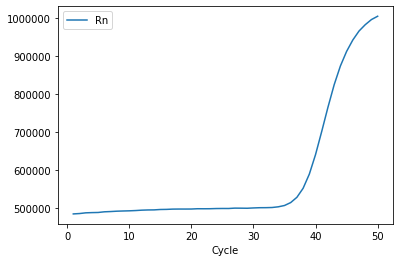

In [193]:
qpcr_amp_data[(qpcr_amp_data['Sample Name'] == '15 nCoV') & (qpcr_amp_data['Target Name'] == 'FAM')].plot(x='Cycle', y='Rn')